**Viết chương trình Python cho thuật toán phân lớp KNN và lấy ví dụ**

**Phân loại học sinh dựa trên thời gian học và làm đề thi:**

Bài toán này dựa trên mẫu thông tin của 47 học sinh, bao gồm: số giờ học (Studying) và số giờ luyện đề thi (Practices) để quyết định phân lớp các học sinh này thành 2 class (đậu hoặc rớt bài kiểm tra).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter


In [ ]:
df = pd.read_csv('/content/Data.csv')
df.head()

,Studying,Practices,Class
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,1,0


In [ ]:
class KNN:
  def __init__(self, k = 3):
    self.k = k

  def fit(self, X, y):
    self.X_train = np.array(X)
    self.y_train = np.array(y)

  def predict(self, X_test):
    X_test = np.array(X_test)
    predictions = [self._predict(x) for x in X_test]
    return predictions

  def _predict(self, x):
    distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [ ]:
# Tách dữ liệu đầu vào và nhãn
X = df[['Studying', 'Practices']].values
y = df['Class'].values

In [ ]:
# Huấn luyện mô hình
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

model = KNN(k=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = np.mean(predictions == y_test)
print("Độ chính xác mô hình:", round(accuracy * 100, 2), "%")


Độ chính xác mô hình: 100.0 %


In [ ]:
new_student = [[5, 5]] # dự đoán học sinh mới
result = model.predict(new_student)[0]
print("Kết quả dự đoán:", "Đậu" if result == 1 else "Rớt")

Kết quả dự đoán: Đậu


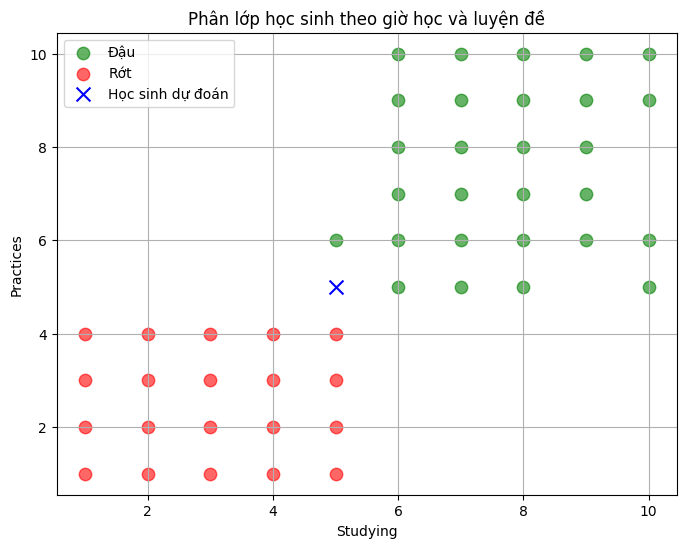

In [ ]:
# Trực quan hóa dữ liệu
X_pass = X[y == 1]
X_fail = X[y == 0]

plt.figure(figsize=(8, 6))
plt.scatter(X_pass[:, 0], X_pass[:, 1], color='green', label='Đậu', s=80, alpha=0.6)
plt.scatter(X_fail[:, 0], X_fail[:, 1], color='red', label='Rớt', s=80, alpha=0.6)
plt.scatter(new_student[0][0], new_student[0][1], color='blue', label='Học sinh dự đoán', s=100, marker='x')

plt.xlabel('Studying')
plt.ylabel('Practices')
plt.title('Phân lớp học sinh theo giờ học và luyện đề')
plt.legend()
plt.grid(True)
plt.show()